In [10]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import torch
import os
from torchvision.io import read_image
from pathlib import Path
from torch.utils.data import Dataset
from torch.utils.data.dataloader import DataLoader
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
from torchvision.transforms import ToTensor
import pickle

In [11]:
images = []
labels = []
for folder in sorted(os.listdir("archiveOriginal")):
    file_path = os.path.join("archiveOriginal", folder)
    if ".DS_Store" not in folder:
        for image in os.listdir(os.path.join(file_path, "0")):
            image_path = os.path.join(file_path, "0", image)
            image_data = read_image(image_path)
            if image_data.shape == (3, 50, 50):
                images.append(image_data)
                labels.append(0)
        for image in os.listdir(os.path.join(file_path, "1")):
            image_path = os.path.join(file_path, "1", image)
            image_data = read_image(image_path)
            if image_data.shape == (3, 50, 50):
                images.append(image_data)
                labels.append(1)

images_numpy = np.stack(images, axis=0)
labels = np.array(labels)

with open("dataOriginal.pkl", "wb") as f:
    pickle.dump({"images":images_numpy, "labels":labels}, f)



In [12]:
with open("dataOriginal.pkl", "rb") as f:
    data = pickle.load(f)

    print(data["images"].shape)

(275222, 3, 50, 50)


Text(0.5, 1.0, 'Class Sizes')

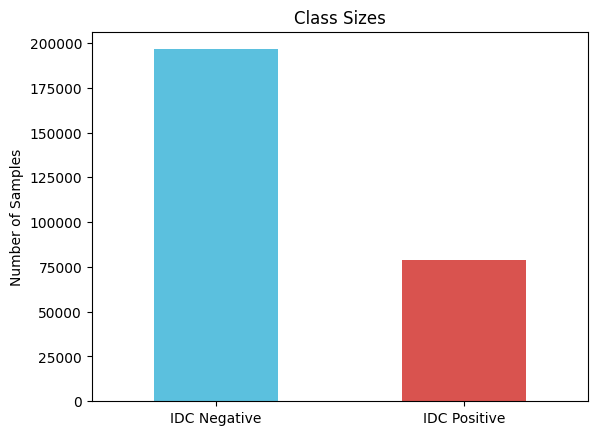

In [36]:
df = pd.DataFrame(labels, columns = ['Class'])
df["Class"] = df["Class"].replace({0:"IDC Negative", 1:"IDC Positive"})
ax = df["Class"].value_counts().plot(kind='bar', rot=0, color=['#5bc0de','#d9534f'])
ax.set_ylabel("Number of Samples")
ax.set_title("Class Sizes")
